In [1]:
import os
import pandas as pd

# Set the path depending on whether you're on Kaggle or running locally
if os.path.exists('/kaggle/input'):
    # Kaggle environment
    data_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
else:
    # Local environment (put your local path here)
    data_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Load the dataset
df = pd.read_csv(data_path)
df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

## EDA ##

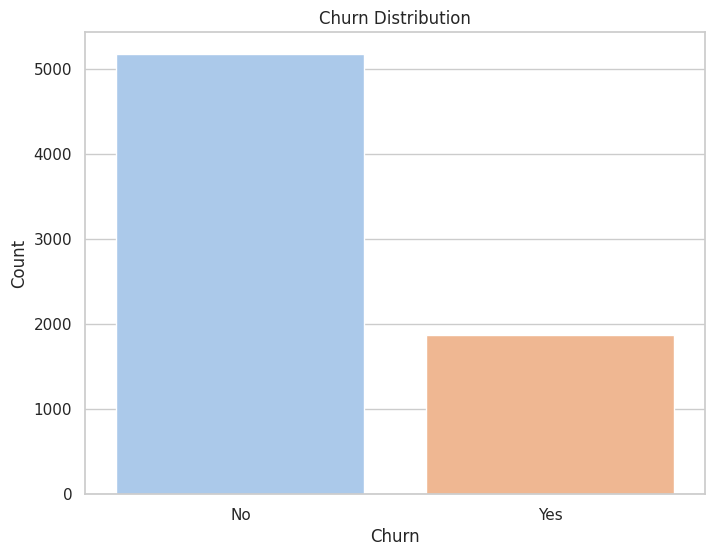

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style for seaborn
sns.set(style="whitegrid")
# Create a count plot for the 'Churn' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [4]:
df_eda = df.copy()

In [5]:
df_eda["customerID"].nunique()  


7043

In [6]:
#Data Cleaning
for col in df_eda.columns:
    if df_eda[col].dtype == 'object':
        # Convert categorical variables to category type
        df_eda[col] = df_eda[col].astype('category')
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        # Fill missing numerical values with the mean
        df_eda[col].fillna(df_eda[col].mean(), inplace=True)
# Check for missing values
missing_values = df_eda.isnull().sum()
# Display missing values
missing_values[missing_values > 0]
# Display the first few rows of the cleaned DataFrame
df_eda.head()




/tmp/ipykernel_35/1154159502.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda[col].fillna(df_eda[col].mean(), inplace=True)
/tmp/ipykernel_35/1154159502.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder


encoded_dict = {}
le_cols = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",\
          "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
for col in le_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoded_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))


In [8]:
df["PhoneService"].unique()

array([0, 1])

## Model ##

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn'])
y = df['Churn']
# Show non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Non-numeric columns:", non_numeric_cols)

# Check for bad values in these columns
for col in non_numeric_cols:
    print(f"\nUnique values in {col}:", X[col].unique())
# Replace blank strings with a known value
X[non_numeric_cols] = X[non_numeric_cols].replace(' ', 'Unknown')

# Define preprocessor for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), non_numeric_cols)
    ],
    remainder='passthrough'  # Leave other columns as is
)

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Non-numeric columns: ['customerID', 'TotalCharges']

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values in TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Model Accuracy: 0.77


In [10]:
from sklearn.ensemble import RandomForestClassifier
# Build pipeline with RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42, n_estimators=50, max_depth=None , min_samples_split=5))
])
# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)
# Evaluate the Random Forest model
accuracy_rf = pipeline_rf.score(X_test, y_test)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")


Random Forest Model Accuracy: 0.80


## HP Tuning ##

In [11]:
#hyper parameter tuning of random forest
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}
# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {test_accuracy:.2f}")


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best Cross-Validation Score: 0.80
Test Accuracy of Best Model: 0.80
